In [1]:
import xarray as xr
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [2]:
ds = xr.open_dataset('Africa_cru_data.nc')
ds

<xarray.Dataset> Size: 378MB
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 126MB ...
    stn      (time, lat, lon) float64 252MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [3]:
da=ds.pre
da

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)> Size: 126MB
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [4]:
prep_ght = da.sel(time=slice('2000-1','2009-12'),lon=slice(-3.5,1.5),lat=slice(4.5,11.5))
prep_ght

<xarray.DataArray 'pre' (time: 120, lat: 14, lon: 10)> Size: 67kB
[16800 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 960B 2000-01-16 2000-02-15 ... 2009-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [5]:
prep_t=prep_ght.groupby('time.month').sum('time')
prep_t

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 2.63299988e+02, 2.72199982e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.43000000e+02, 2.41700012e+02, 2.28800018e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.93600021e+02, 1.90899994e+02, 1.85900009e+02, ...,
         1.43199997e+02, 2.43599991e+02, 0.00000000e+00],
        ...,
        [2.45000000e+01, 7.69999981e+00, 1.57000008e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.44000006e+01, 7.00000000e+00, 7.40000010e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.59999990e+00, 6.39999962e+00, 6.00000048e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 5.17299988e+02, 5.26799988e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.55799988e+02, 5.88799988e+02, 5.62899963e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.83900085e+02, 5.92699951e+02, 5.78200012e+02, ...,
         2.12800003e+02, 3.41300018e+02, 0.00000000e+00],
...
         8.80999985e+01, 8.49000015e+01, 8.25999985e+01],
        [9.45000000e+01, 7.17999954e+01, 7.42000046e+01, ...,
         5.19000015e+01, 5.20000000e+01, 4.89000015e+01],
        [7.09000015e+01, 5.97000008e+01, 5.35000000e+01, ...,
         4.10999985e+01, 4.05999985e+01, 2.60999985e+01]],

       [[0.00000000e+00, 5.78400024e+02, 5.69700012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00199982e+02, 4.82100037e+02, 4.47900024e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.81399994e+02, 3.74799988e+02, 3.70000000e+02, ...,
         1.78399994e+02, 2.21200012e+02, 0.00000000e+00],
        ...,
        [1.48000002e+01, 1.25000000e+01, 9.70000076e+00, ...,
         9.10000038e+00, 1.01000004e+01, 8.30000019e+00],
        [8.80000019e+00, 7.70000029e+00, 5.59999943e+00, ...,
         5.59999990e+00, 6.10000038e+00, 2.20000005e+00],
        [5.80000019e+00, 5.20000029e+00, 4.59999990e+00, ...,
         2.60000014e+00, 3.10000014e+00, 1.90000010e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [6]:
prep_T=prep_t.groupby('month').mean('month')
prep_T

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 2.63299988e+02, 2.72199982e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.43000000e+02, 2.41700012e+02, 2.28800018e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.93600021e+02, 1.90899994e+02, 1.85900009e+02, ...,
         1.43199997e+02, 2.43599991e+02, 0.00000000e+00],
        ...,
        [2.45000000e+01, 7.69999981e+00, 1.57000008e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.44000006e+01, 7.00000000e+00, 7.40000010e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.59999990e+00, 6.39999962e+00, 6.00000048e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 5.17299988e+02, 5.26799988e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.55799988e+02, 5.88799988e+02, 5.62899963e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.83900085e+02, 5.92699951e+02, 5.78200012e+02, ...,
         2.12800003e+02, 3.41300018e+02, 0.00000000e+00],
...
         8.80999985e+01, 8.49000015e+01, 8.25999985e+01],
        [9.45000000e+01, 7.17999954e+01, 7.42000046e+01, ...,
         5.19000015e+01, 5.20000000e+01, 4.89000015e+01],
        [7.09000015e+01, 5.97000008e+01, 5.35000000e+01, ...,
         4.10999985e+01, 4.05999985e+01, 2.60999985e+01]],

       [[0.00000000e+00, 5.78400024e+02, 5.69700012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.00199982e+02, 4.82100037e+02, 4.47900024e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.81399994e+02, 3.74799988e+02, 3.70000000e+02, ...,
         1.78399994e+02, 2.21200012e+02, 0.00000000e+00],
        ...,
        [1.48000002e+01, 1.25000000e+01, 9.70000076e+00, ...,
         9.10000038e+00, 1.01000004e+01, 8.30000019e+00],
        [8.80000019e+00, 7.70000029e+00, 5.59999943e+00, ...,
         5.59999990e+00, 6.10000038e+00, 2.20000005e+00],
        [5.80000019e+00, 5.20000029e+00, 4.59999990e+00, ...,
         2.60000014e+00, 3.10000014e+00, 1.90000010e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [7]:
where=prep_T.groupby('month').where(prep_T>250)
where

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[       nan,  263.3    ,  272.19998, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  517.3    ,  526.8    , ...,        nan,
                nan,        nan],
        [ 555.8    ,  588.8    ,  562.89996, ...,        nan,
                nan,        nan],
        [ 583.9001 ,  592.69995,  578.2    , ...,        nan,
          341.30002,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  578.4    ,  569.7    , ...,        nan,
                nan,        nan],
        [ 500.19998,  482.10004,  447.90002, ...,        nan,
                nan,        nan],
        [ 381.4    ,  374.8    ,  370.     , ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [8]:
filled_data = where.fillna(0)
filled_data

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[   0.     ,  263.3    ,  272.19998, ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  517.3    ,  526.8    , ...,    0.     ,
            0.     ,    0.     ],
        [ 555.8    ,  588.8    ,  562.89996, ...,    0.     ,
            0.     ,    0.     ],
        [ 583.9001 ,  592.69995,  578.2    , ...,    0.     ,
          341.30002,    0.     ],
...
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  578.4    ,  569.7    , ...,    0.     ,
            0.     ,    0.     ],
        [ 500.19998,  482.10004,  447.90002, ...,    0.     ,
            0.     ,    0.     ],
        [ 381.4    ,  374.8    ,  370.     , ...,    0.     ,
            0.     ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

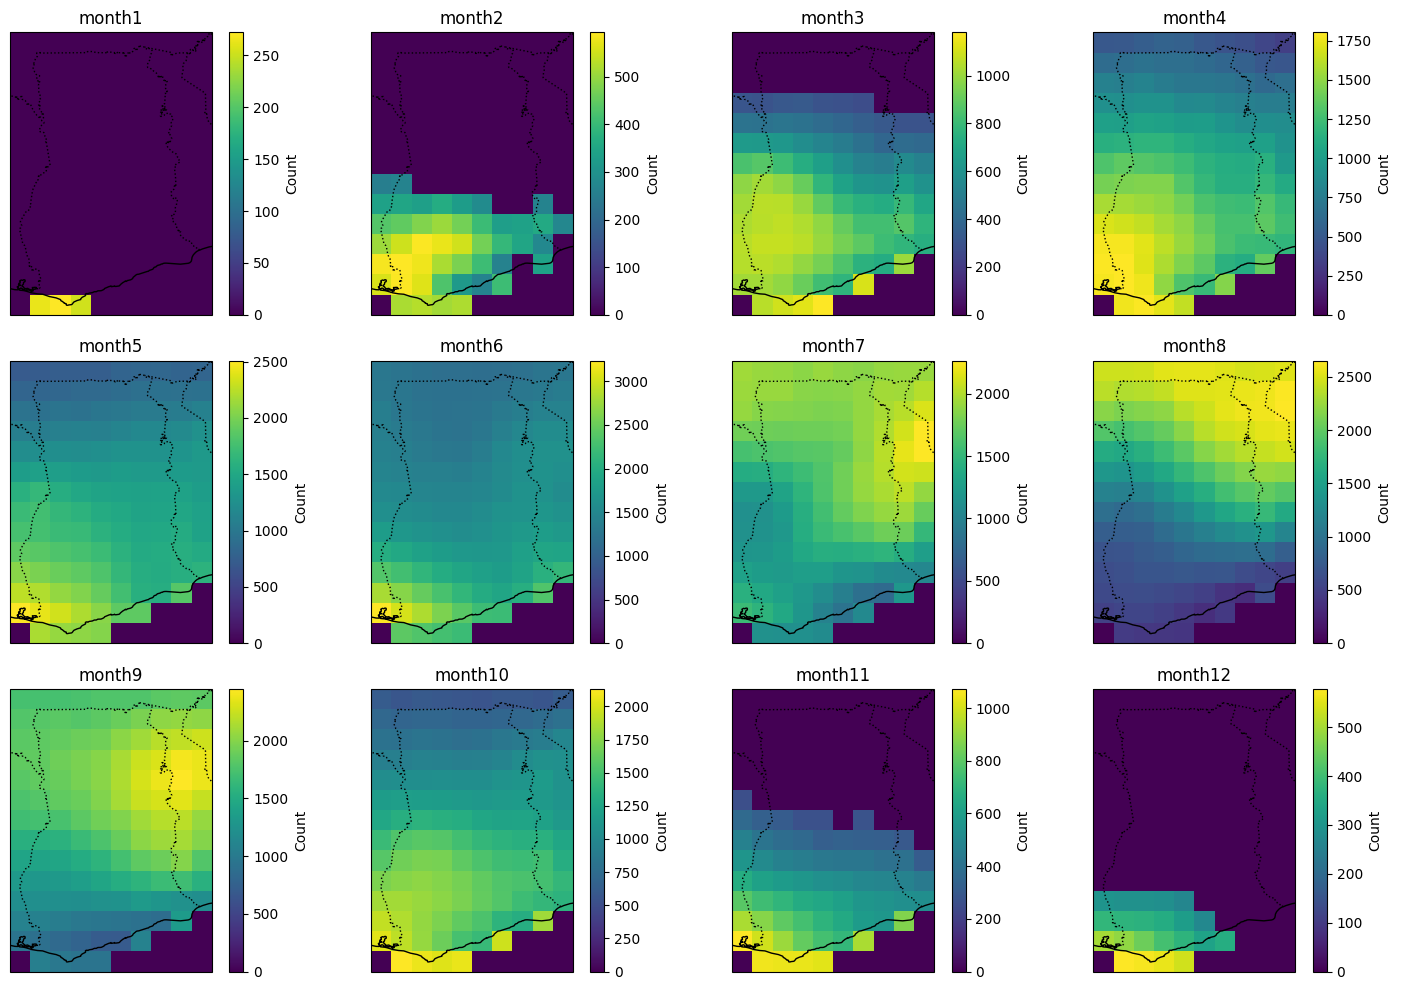

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10),subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(12):
    month_data = filled_data.isel(month=i)
    month_data.plot(ax=axes[i],transform=ccrs.PlateCarree(),  cmap='viridis',cbar_kwargs={'label': 'Count'})
    
    axes[i].set_title(f'month{i + 1}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

    
    
    axes[i].coastlines()
    axes[i].add_feature(cfeature.BORDERS, linestyle=':')
    axes[i].add_feature(cfeature.LAND, edgecolor='black', alpha=0.3)
    axes[i].add_feature(cfeature.OCEAN, alpha=0.1)

plt.tight_layout()
plt.show()